# Task1 Object Detection using YOLOv3 on COCO Dataset

## Ahmed Mady, The Sparks Foudation, Computer Vision Intern

## Import Libraries

In [2]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="tensorflow")

## Method to get Classes for text file

In [3]:
def get_classes(file):
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

## Method to Process an Image

In [4]:
def process_image(img):
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

## Method for Bounding Box

In [18]:
def draw(image, boxes, scores, classes, all_classes):
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 2,
                    cv2.LINE_8)
        #cv2.LINE_AA

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

## Method to Detect Images

In [6]:
def detect_image(image, yolo, all_classes):
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

## Calling the Pretrained Model

In [7]:
yolo = YOLO(0.1, 0.3)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

C:\Users\Khaled\anaconda3\envs\python-cvcourse\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Testing the Detection on a couple of Images

time: 17.37s
class: person, score: 0.40
box coordinate x,y,w,h: [510.84303021 261.73099732  85.04678041 174.91770068]
class: person, score: 0.20
box coordinate x,y,w,h: [438.10192704 277.84525168  18.78597636  43.94542762]
class: person, score: 0.17
box coordinate x,y,w,h: [ 65.10705411 267.71197975 390.11091828  93.60502104]
class: person, score: 0.15
box coordinate x,y,w,h: [244.00950968 293.96652907  50.59223935  74.15652135]
class: person, score: 0.12
box coordinate x,y,w,h: [409.59110022 272.11795074  17.72166941  38.11261951]
class: person, score: 0.11
box coordinate x,y,w,h: [177.16713667 294.07922089  23.55258301  46.63568035]
class: person, score: 0.11
box coordinate x,y,w,h: [292.6479274  268.92717075  81.39774457 169.702288  ]
class: bicycle, score: 0.80
box coordinate x,y,w,h: [506.24791741 331.71455675  87.89873421 119.12700008]
class: bicycle, score: 0.37
box coordinate x,y,w,h: [239.02810395 332.07237899  55.83978385  68.42061058]
class: traffic light, score: 0.13
box co

True

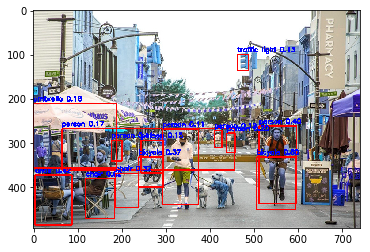

In [20]:
path = 'images/test/1.jpg'   
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
plt.imshow(image)
cv2.imwrite('images/res/1.jpg', image)

time: 17.95s
class: person, score: 1.00
box coordinate x,y,w,h: [127.82588601 121.39128149 116.96171761 246.66765332]
class: person, score: 1.00
box coordinate x,y,w,h: [  2.78373808  95.50598636 119.82347071 287.83989698]
class: person, score: 1.00
box coordinate x,y,w,h: [270.39265633 116.54279754 203.34221423 262.9551664 ]
class: person, score: 0.59
box coordinate x,y,w,h: [234.64420438 106.43148422 134.54343379 184.16468427]
class: bench, score: 0.38
box coordinate x,y,w,h: [ -9.29996371 189.25190717 450.62202215 172.38432169]
class: bench, score: 0.36
box coordinate x,y,w,h: [  1.6163066  163.82483393 128.49809229 216.36030078]
class: bench, score: 0.18
box coordinate x,y,w,h: [283.2235992  177.75103077 225.91543198 190.24624676]



True

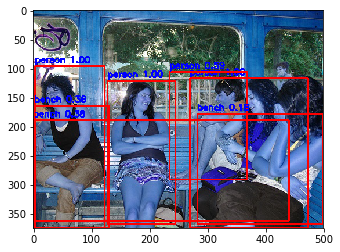

In [21]:
path = 'images/test/2.jpg'   
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
plt.imshow(image)
cv2.imwrite('images/res/2.jpg', image)

time: 16.53s
class: car, score: 0.99
box coordinate x,y,w,h: [346.46186829 338.5263133  251.32062435 104.13499224]
class: car, score: 0.98
box coordinate x,y,w,h: [ -7.15360343 343.86433387 309.97148752 111.4309727 ]
class: car, score: 0.93
box coordinate x,y,w,h: [301.87497139 279.15410423 200.25817752  74.81298158]
class: car, score: 0.74
box coordinate x,y,w,h: [ 34.82562304 282.62624788 219.21383142  73.73627031]
class: car, score: 0.68
box coordinate x,y,w,h: [258.03158283 226.69960034 167.31060147  70.6382921 ]



True

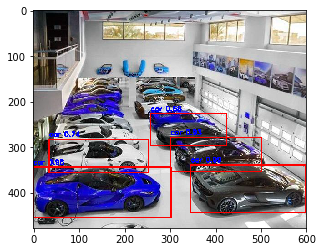

In [22]:
path = 'images/test/3.jpg'   
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
plt.imshow(image)
cv2.imwrite('images/res/3.jpg', image)

time: 16.40s
class: person, score: 0.60
box coordinate x,y,w,h: [2523.36752415 1482.90827608  621.14270031 1302.12939548]
class: bicycle, score: 0.84
box coordinate x,y,w,h: [2877.7012825  2007.04610348 1301.56517029  721.28452325]
class: bicycle, score: 0.51
box coordinate x,y,w,h: [ 816.12244248 1952.52190018 1265.25861025  818.2108674 ]
class: bicycle, score: 0.22
box coordinate x,y,w,h: [4421.53716087 2186.49156475 1445.58727741  583.60729289]



True

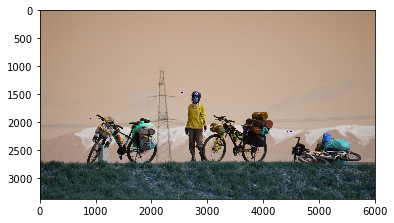

In [23]:
path = 'images/test/4.jpg'   
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
plt.imshow(image)
cv2.imwrite('images/res/4.jpg', image)

time: 17.65s
class: person, score: 1.00
box coordinate x,y,w,h: [187.71986008  84.54499674  91.60767555 304.36181641]
class: horse, score: 1.00
box coordinate x,y,w,h: [396.45050049 137.28213882 215.7049942  208.54855251]
class: dog, score: 1.00
box coordinate x,y,w,h: [ 61.28294468 263.38461542 145.58371544  88.16218674]



True

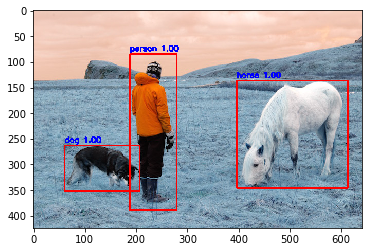

In [24]:
path = 'images/test/5.jpg'   
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
plt.imshow(image)
cv2.imwrite('images/res/5.jpg', image)